# DSP - Sampling Exercise
***
**Federal University of Campina Grande (Universidade Federal de Campina Grande)**

Author: **João Pedro Melquiades Gomes**

Email: **joao.melquiades@ee.ufcg.edu.br**
***

## Generating the signal
***
This entire exercise will use the following signal:

$x(t) = cos(2\pi3200t) + 0.5cos(2\pi600t) + 0.01cos(2\pi300t)$

I will assume that some gaussian noise corrupted this signal during the transmission, only to make things more interesting.

First, we have three frequency components in this signal: $f_1 = 300Hz$, $f_2 = 600Hz$ and $f_3 = 3200Hz$. Thus, the Fourier transform will be three impulse pairs centered in 0 and located at $\pm f_1, \pm f_2$ and $\pm f_3$. Once we are simulating an analogic signal in digital world, the representation will not be exactly three impulses, and there will be a lot of noise because we are adding it. So, let's code.

In [1]:
# Important imports
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [27]:
Xf[int(t.size/2)]

(-5.162413112015633-0j)

In [28]:
np.sum(xt + noise)

-5.162413112015765

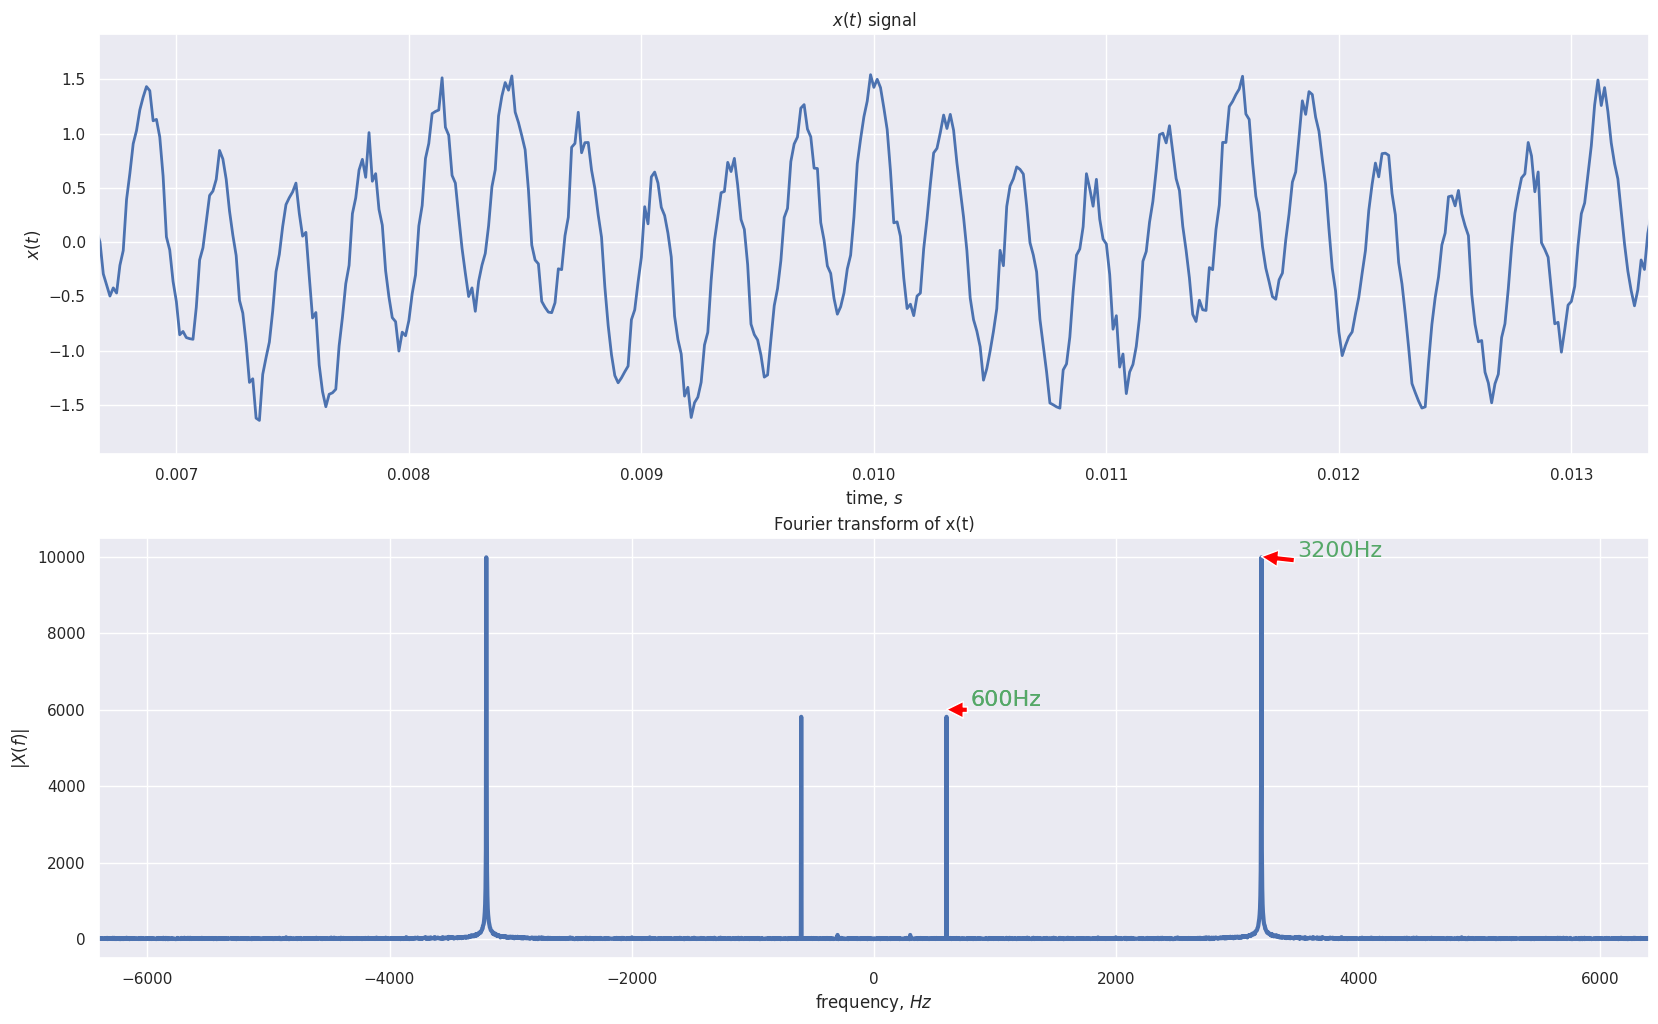

In [43]:
# Let's save 100 periods of the fundamental frequency of signal

f_1 = 300 #Hz
f_2 = 600 #Hz
f_x = 3200 #Hz

# This doesn't make sense, it is only to simulate the analogic signal, but in fact it is a digital
# one with this sampling frequency
analog_fs = 1/70000

t = np.arange(0, 100*1/f_1, analog_fs)

# signal declaration
xt = np.cos(2*np.pi*f_x*t) + 0.5*np.cos(2*np.pi*f_2*t) + 0.01*np.cos(2*np.pi*f_1*t)

#Let's add some noise to make things more interesting
noise = np.random.normal(0,0.1, t.size)


plt.figure(figsize=(20,12))


# Time domain
plt.subplot(2,1,1)
plt.plot(t, xt + noise, linewidth=2)
plt.title("$x(t)$ signal")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

# The fftshift centers the representation in 0, and we can observe
# how the analogic fourier transform should be. Also, the DFT range is
# -2pi to 2pi. In fact, this is a discret fourier transform. I am converting
# the frequency axis from rad to Hz to show the representation of analogic
# fourier transform

Xf = fftshift(fft(xt + noise))
f = fftshift(fftfreq(t.size, t[1]-t[0]))
plt.plot(f, np.abs(Xf), linewidth=3)
# plt.vlines([300, 600, 3200], -80, 0, linestyle='--', color='red')
plt.grid("on", which="both")
plt.xlim(-2*f_x, 2*f_x)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")


plt.annotate('600Hz', xy = (600, 6000), 
             fontsize = 16, xytext = (800, 6100), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.annotate('3200Hz', xy = (3200, 10000), 
             fontsize = 16, xytext = (3500, 10000), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.annotate('300Hz', xy = (300, 6000), 
             fontsize = 16, xytext = (800, 6100), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')


plt.show()

